<a href="https://colab.research.google.com/github/huynhminhtuan3006-sketch/VGG16/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fiftyone

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.6/112.6 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 164.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 87.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.1/313.1 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.3/934.3 kB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 13.9 MB/s eta 

In [2]:
import fiftyone as fo
import fiftyone.zoo as foz


/usr/local/lib/python3.12/dist-packages/glob2/fnmatch.py:141: SyntaxWarning: invalid escape sequence '\Z'
  return '(?ms)' + res + '\Z'


In [3]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [4]:
!ls


drive  sample_data


In [5]:
!ls coco_data
!ls coco_data/annotations

ls: cannot access 'coco_data': No such file or directory
ls: cannot access 'coco_data/annotations': No such file or directory


In [6]:
EXPORT_DIR = "/content/drive/MyDrive/datasets/coco_data"

In [7]:
import fiftyone as fo

train_ds = fo.Dataset.from_dir(
    dataset_type=fo.types.COCODetectionDataset,
    data_path="/content/drive/MyDrive/coco_data/train2017",
    labels_path="/content/drive/MyDrive/coco_data/annotations/instances_train2017.json"
)

 100% |███████████████| 1000/1000 [7.5s elapsed, 0s remaining, 130.6 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1000/1000 [7.5s elapsed, 0s remaining, 130.6 samples/s]      


In [8]:
import os
import cv2
from pycocotools.coco import COCO

def crop_coco(split):
    ann_file = f"/content/drive/MyDrive/coco_data/annotations/instances_{split}2017.json"
    img_dir = f"/content/drive/MyDrive/coco_data/{split}2017"
    out_dir = f"dataset/{split}"

    class_map = {
        "car": "car",
        "bus": "bus",
        "truck": "truck",
        "motorcycle": "motorbike",
        "bicycle": "bicycle",
        "airplane": "airplane",
        "train": "train",
        "boat": "boat"
    }

    coco = COCO(ann_file)

    for coco_cls, folder in class_map.items():
        cat_id = coco.getCatIds(catNms=[coco_cls])[0]
        img_ids = coco.getImgIds(catIds=[cat_id])

        os.makedirs(os.path.join(out_dir, folder), exist_ok=True)

        count = 0
        for img_id in img_ids:
            img_info = coco.loadImgs(img_id)[0]
            img_path = os.path.join(img_dir, img_info["file_name"])

            img = cv2.imread(img_path)
            if img is None:
                continue

            ann_ids = coco.getAnnIds(imgIds=[img_id], catIds=[cat_id])
            anns = coco.loadAnns(ann_ids)

            for ann in anns:
                x, y, w, h = map(int, ann["bbox"])
                crop = img[y:y+h, x:x+w]

                if crop.size == 0:
                    continue

                save_path = os.path.join(
                    out_dir, folder, f"{img_id}_{count}.jpg"
                )
                cv2.imwrite(save_path, crop)
                count += 1

            if count > 1000:  # giới hạn cho nhẹ máy
                break

        print(f"{split}/{folder}: {count} images")

crop_coco("train")
crop_coco("val")

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
train/car: 1002 images
train/bus: 212 images
train/truck: 349 images
train/motorbike: 289 images
train/bicycle: 315 images
train/airplane: 212 images
train/train: 180 images
train/boat: 385 images
loading annotations into memory...
Done (t=0.22s)
creating index...
index created!
val/car: 323 images
val/bus: 51 images
val/truck: 62 images
val/motorbike: 61 images
val/bicycle: 78 images
val/airplane: 25 images
val/train: 35 images
val/boat: 78 images


In [9]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader


In [10]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

train_data = datasets.ImageFolder("dataset/train", transform=transform)
val_data   = datasets.ImageFolder("dataset/val", transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_data, batch_size=32, shuffle=False)

num_classes = len(train_data.classes)
print(train_data.classes)


['airplane', 'bicycle', 'boat', 'bus', 'car', 'motorbike', 'train', 'truck']


In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.vgg16(pretrained=True)

for p in model.features.parameters():
    p.requires_grad = False

model.classifier[6] = nn.Linear(4096, num_classes)
model = model.to(device)


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


100%|██████████| 528M/528M [00:03<00:00, 174MB/s]


In [12]:
import time
start_time = time.time()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.classifier.parameters(), lr=1e-4)

for epoch in range(5):
    model.train()
    total_loss = 0

    for x, y in train_loader:
        x, y = x.to(device), y.to(device)

        optimizer.zero_grad()
        out = model(x)
        loss = criterion(out, y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1} - Loss: {total_loss/len(train_loader):.4f}")

curent_time = time.time()                              # Get current time
total_time = curent_time - start_time                  # Calculate total time
print(f'training took: {total_time/60:.2f} minutes!')  # Print training time in minutes


Epoch 1 - Loss: 1.0103
Epoch 2 - Loss: 0.4372
Epoch 3 - Loss: 0.1919
Epoch 4 - Loss: 0.0966
Epoch 5 - Loss: 0.0662
training took: 1.95 minutes!


In [13]:
torch.save(
    model.state_dict(),
    "/content/drive/MyDrive/vgg16_vehicle_coco.pth"
)


In [14]:
import torch

correct = 0
total = 0
val_loss = 0

criterion = torch.nn.CrossEntropyLoss()

with torch.no_grad():
    for imgs, labels in val_loader:
        imgs, labels = imgs.to(device), labels.to(device)

        outputs = model(imgs)
        loss = criterion(outputs, labels)
        val_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
val_loss /= len(val_loader)

print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {accuracy:.2f}%")


Validation Loss: 0.9451
Validation Accuracy: 72.23%


In [15]:
from PIL import Image
from torchvision import transforms
import torch
import matplotlib.pyplot as plt

img_path = "dataset/val/car/000000123456_0.jpg"  # đổi ảnh bất kỳ

Using image: dataset/val/car/73_97.jpg


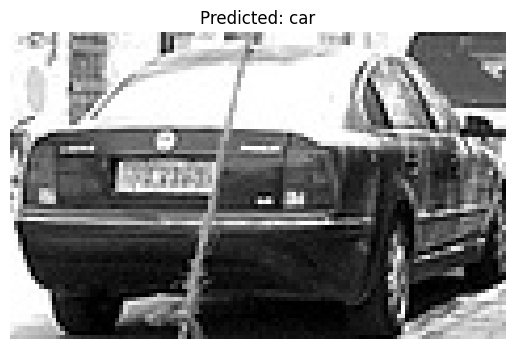

In [16]:
import os
import random

# Dynamically find an existing image path
car_images_dir = "dataset/val/car"
if os.path.exists(car_images_dir):
    image_files = [f for f in os.listdir(car_images_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
    if image_files:
        img_path = os.path.join(car_images_dir, random.choice(image_files))
        print(f"Using image: {img_path}")
    else:
        print(f"No image files found in {car_images_dir}. Please check if the cropping process in cell `QOa1e5Ap5vH8` completed successfully.")
        img_path = None
else:
    print(f"Directory {car_images_dir} does not exist. Please check your data export and cropping steps.")
    img_path = None

if img_path:
    # Reuse the transform defined earlier
    # (assuming 'transform' and 'device' are defined in previous cells and are in scope)
    # (assuming 'model' and 'train_data' are defined in previous cells and are in scope)

    img = Image.open(img_path).convert("RGB")
    input_tensor = transform(img).unsqueeze(0).to(device)

    # Make prediction
    model.eval()                           # Set model to evaluation mode
    with torch.no_grad():
        output = model(input_tensor)

    # Get predicted class
    _, predicted_idx = torch.max(output, 1)
    predicted_class = train_data.classes[predicted_idx.item()]

    # Display image and prediction
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis("off")
    plt.show()
else:
    print("Cannot proceed with image prediction without a valid image path.")